

```
# This is formatted as code
```

# Neural Networks: Hand Sign Detection
### Welcome to homework 2  &#128522;&#9996;

We will start by loading the packages:



In [ ]:
import os
import string
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
import IPython

%matplotlib inline

Then, Unzip the data:

In [ ]:
with zipfile.ZipFile('./data.zip', 'r') as zip_ref:
    zip_ref.extractall('./data')

and Normalize the data before feeding to model:


از آنجا که 255 حداکثر مقدار پیکسل است. مقیاس 1./255 برای تبدیل هر مقدار پیکسل از محدوده [0،255] -> [0،1] است




In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255, validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale = 1/255)

After, we load the dataset:

In [ ]:
train_generator = train_datagen.flow_from_directory(
    './data/Train',
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "sparse",
    color_mode='grayscale',
    subset = 'training'
    )

validation_generator = train_datagen.flow_from_directory(
    './data/Train',
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "sparse",
    color_mode='grayscale',
    subset = 'validation'
    )

test_generator = test_datagen.flow_from_directory(
    './data/Test',
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "sparse",
    color_mode='grayscale'
    )

Found 21974 images belonging to 24 classes.
Found 5481 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.




```
# This is formatted as code
```

The input data are from different 24 classes excluding J and Z:

In [ ]:
classes = [char for char in string.ascii_uppercase if char != "J" if char != "Z"]
print(classes, end = " ")

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y'] 

Now, take a look at some examples of images in the dataset. Feel free to change the value of array range and re-run to see different examples.

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img[:,:,0])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

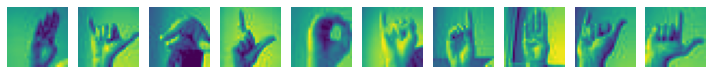

[ 1. 23. 15. 10. 13.  8.  3.  1. 23. 10.]


In [ ]:
sample_training_images, sample_training_labels = next(train_generator)
plotImages(sample_training_images[:10])
print(sample_training_labels[:10])

In [ ]:
sample_testing_images, sample_testing_labels = next(test_generator)

From now implement your model.
<br>
Please add cells and explain yours developing steps and your results.

<div dir='rtl'style="text-align: right;font-family:verdana;">
برای توضیحات از زبان فارسی استفاده نمایید.
<br>
موفق باشید

</div>

<div dir='rtl'style="text-align: right;font-family:verdana;">
چون در سوال تخمینی از مدل داده نشده است، بنابر این ما فرض می کنیم خطای مدل را نمی دانیم تا چه اندازه است برای همین باتوجه به رابطه بین بایاس و واریانس در مدل ما سعی می کنیم مدل را تا حد ممکن پیچیده کنیم تا یک خطای اولیه بدست بیاوریم.
<br>

مدل را به صورت زیر ساختیم:
</div>

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(784, activation='relu'),
    tf.keras.layers.Dense(784, activation='relu'),
    tf.keras.layers.Dense(784, activation='relu'),
    tf.keras.layers.Dense(784, activation='relu'),
    tf.keras.layers.Dense(784, activation='relu'),
    tf.keras.layers.Dense(24)
])


<div dir='rtl'style="text-align: right;font-family:verdana;">
مدل ساخته شده به صورت full-conected است و همچنین ما تعداد نرون ها را زیاد گرفتیم (منظور از زیاد در اینجا به تعداد داده های ورودی می باشد و این را به این علت می گویم که می توانستیم مدل ساده تری بسازیم نیازی به این تعداد نود در هر لایه نبود)<br>
  در این مدل ۵ لایه میانی در نظر گرفته شده است 
<br>
جروجی ۲۴ کلاس مورد نظر ما می باشد.
<br>
نهایتا مطابق زیر ما مدل را کامپایل می کنیم و از بهینه ساز ادم استفاده می کنیم:
</div>

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

<div dir='rtl'style="text-align: right;font-family:verdana;">
خب حال باید fit را برای مدلمان انجام دهیم به همین سبب ابتدا بدست می آوریم چند بچ داریم و برای هر epoch ما چه تعداد بچ را باید به مدل بدیهم.
<br>
این کار را هم برای داده های validation و هم داده های تست انجام می دهیم:
</div>

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
model.fit_generator(generator=train_generator,
steps_per_epoch=STEP_SIZE_TRAIN,
validation_data=validation_generator,
validation_steps=STEP_SIZE_VALID,
epochs=1000
)

NameError: ignored

<div dir='rtl'style="text-align: right;font-family:verdana;">
ما تعداد epoch ها را خیلی کم گرفتیم و دلیل ای کار فقط محدودیت زمان است البته اگر دقت شود دقت مدل تا همینجا هم دقت خوبی است هم روی داده های validation تست 
<br>
با توجه بیشتر متوجه می شویم که در داده های validation دقت دادر افت می کنید در حالی که دقت روی train خیلی بهتر شده استو نشان می دهد مدل ما overfit شده است.
<br>
در ادامه داده های تست را به مدل می دهیم خواهیم دید داده های تست نیز نتایج خوبی ندارند و دقت حتی از validation هم کمتر است 
البته لازم به ذکر است که ما نتیجه
 overfit بودن مدل را بهتر است از داده های validation متوجه شویم نه تست که اگر از داده های تست نیز برای بهبود مدل استفاده کنیم نشان می دهد داده های تست را نیز به عنوان validation دوم در نظر گرفتیم که درست نیست.
<br>
نکته دیگر که قابل ذکر است تفاوت خطای validation و تست است از آنجا که توزیع ها یکسان باید باشد این تفاوت بنظر کمی زیاد است! اما خب از طرفی overfit شدن مدل را هم می دانیم. 
 </div>

In [ ]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
test_loss, test_acc = model.evaluate_generator(
test_generator,
steps=STEP_SIZE_TEST,
verbose=2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


56/56 - 2s - loss: 1.6440 - accuracy: 0.6755


In [ ]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

 1/56 [..............................] - ETA: 6s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


56/56 [==============================] - 2s 38ms/step


<div dir='rtl'style="text-align: right;font-family:verdana;">
اگر بخواهیم مقادیر را با مدل پیشبینی کینم از رابطه زیر استفاده می کنیم:
</div>

In [ ]:
predicted_class_indices=np.argmax(pred,axis=1)


labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [ ]:
predictions[0]

'H'

<div dir='rtl'style="text-align: right;font-family:verdana;">
 دیدیم که دقت مدل ما بر روی داده های اعتبار سنجی پس از آموزش برای تعدادی از دوره ها به اوج خود می رسد و سپس راکد می شود یا شروع به کاهش می کند.

به عبارت دیگر ، مدل ما با داده های آموزش سازگار است. اگرچه غالباً می توان به دقت بالایی در مجموعه آموزش دست یافت ، اما آنچه ما واقعاً می خواهیم این است که مدلهایی را بسط دهیم که به مجموعه آزمایشات تعمیم داده شوند (یا داده هایی که قبلاً ندیده اند).

نقطه مقابل underfit ،overfit  است. underfit زمانی اتفاق می افتد که هنوز زمینه برای بهبود داده های train وجود دارد. این می تواند به چند دلیل اتفاق بیفتد: اگر مدل به اندازه کافی قدرتمند نباشد ، بیش از حد قاعده مند شده باشد ، یا اینکه به مدت کافی آموزش ندیده باشد. این بدان معنی است که شبکه الگوهای مربوط به داده های آموزش را یاد نگرفته است.

اگر خیلی طولانی train کنید ، مدل شروع به overfit می کند و الگوهایی را از داده های آموزشی یاد می گیرد که به داده های آزمون تعمیم ندارند. ما باید تعادل برقرار کنیم. درک نحوه آموزش برای تعداد مناسب دوره زمانی که در زیر بررسی خواهیم کرد ، مهارت مفیدی است.

برای جلوگیری از،overfit از حد ، بهترین راه حل استفاده از داده های آموزش کامل تر است. مجموعه داده باید طیف کاملی از ورودی هایی را که انتظار می رود مدل مدیریت کند ، پوشش دهد. داده های اضافی فقط در صورتی می توانند مفید باشند که موارد جدید و جالب را پوشش دهند.
مدلی که روی داده های کاملتر آموزش دیده باشد طبیعتاً بهتر تعمیم می یابد. وقتی دیگر این امکان وجود ندارد ، بهترین راه حل بعدی استفاده از روشهایی مانند قاعده مند شدن است. این محدودیت ها در مورد کمیت و نوع اطلاعاتی است که مدل شما می تواند ذخیره کند. اگر یک شبکه فقط توانایی حفظ تعداد کمی از الگوها را داشته باشد ، روند بهینه سازی آن را مجبور می کند تا بر برجسته ترین الگوها تمرکز کند ، که شانس بیشتری برای تعمیم خوب دارند.

ممکن است ما داده های آموزشی دیگری دسترسی نداشته باشیم مثل سوال این تمرین در این صورت باید از تکنیک های موجود regularization استفاده کنیم. 

</div>

In [ ]:
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import regularizers

print(tf.__version__)

2.4.0


In [ ]:
!pip install -q git+https://github.com/tensorflow/docs

import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

     |████████████████████████████████| 1.0MB 9.1MB/s 


In [ ]:
from  IPython import display
from matplotlib import pyplot as plt

import numpy as np

import pathlib
import shutil
import tempfile

In [ ]:
logdir = pathlib.Path(tempfile.mkdtemp())/"tensorboard_logs"
shutil.rmtree(logdir, ignore_errors=True)

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=STEP_SIZE_TRAIN*100,
  decay_rate=1,
  staircase=False)

def get_optimizer():
  return tf.keras.optimizers.Adam(lr_schedule)

<div dir='rtl'style="text-align: right;font-family:verdana;">
در زیر نموداری از نرخ یادگیری بر خسب epoch رسم کرده ایم.  

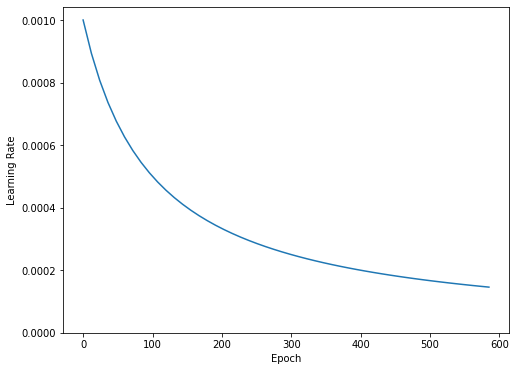

In [ ]:
step = np.linspace(0,100000)
lr = lr_schedule(step)
plt.figure(figsize = (8,6))
plt.plot(step/STEP_SIZE_TRAIN, lr)
plt.ylim([0,max(plt.ylim())])
plt.xlabel('Epoch')
_ = plt.ylabel('Learning Rate')

<div dir='rtl'style="text-align: right;font-family:verdana;">
مدل های مختلفی استفاده کنیم تا نهایتا به یک مقدار مطلوب برسیم در زیر دو مدل کوچک را می بینمی و مدل سوم که بزرکتر است را هم مشاهده می کنیم و بعد با مقایسه این ها می توانیم به نتیجه برسیم.

 راه حل بهتر استفاده ار رگیولاریزیشن استت در همه لایه ها که بتوانیم به یک نمودار مناسب برسیم .

در تست های اولی مقدار
patience=200 
بود برای این که زمان زیادی می برد کم کردیم
</div>


<div dir='rtl'style="text-align: right;font-family:verdana;">


In [ ]:
def get_callbacks(name):
  return [
    tfdocs.modeling.EpochDots(),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=60),    
    tf.keras.callbacks.TensorBoard(logdir/name),
  ]

In [ ]:
def compile_and_fit(model, name, optimizer=None, max_epochs=1000):
  if optimizer is None:
    optimizer = get_optimizer()
  model.compile(optimizer=optimizer,
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.losses.SparseCategoricalCrossentropy(
                      from_logits=True, name='SparseCategoricalCrossentropy'),'accuracy'])

  model.summary()

  history = model.fit(
    train_generator,
    steps_per_epoch = STEP_SIZE_TRAIN,
    epochs=max_epochs,
    validation_data=validation_generator,
    callbacks=get_callbacks(name),
    verbose=0)
  return history

In [ ]:
tiny_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(24)])

In [ ]:
size_histories = {}

In [ ]:
size_histories['Tiny'] = compile_and_fit(tiny_model, 'sizes/Tiny')  #max_epoch=1000

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_18 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 24)                18840     
Total params: 18,840
Trainable params: 18,840
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, SparseCategoricalCrossentropy:2.6859,  accuracy:0.2739,  loss:2.6864,  val_SparseCategoricalCrossentropy:2.2499,  val_accuracy:0.4645,  val_loss:2.2496,  
....................................................................................................
Epoch: 100, SparseCategoricalCrossentropy:0.1975,  accuracy:0.9805,  loss:0.1976,  val_SparseCategoricalCrossentropy:0.2124,  val_accuracy:0.9768,  val_loss:0.2124,  
.............................................................................

<div dir='rtl'style="text-align: right;font-family:verdana;">
دو مدل زیر را به علت این که بسیار طولانی می شد اجرا نکردم اگر مایلید و سیستم شما توانایی بالایی دارد می توانید نتایج ین دو را نیز ببینید احتمالا در تعداد epoch کمتری خاتمه می یابد نسبت به قبلی

In [ ]:
small_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),   
    tf.keras.layers.Dense(24)])

In [ ]:
size_histories = {}


In [ ]:
size_histories['Small'] = compile_and_fit(small_model, 'sizes/Small')

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_19 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_68 (Dense)             (None, 24)                12312     
Total params: 414,232
Trainable params: 414,232
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, SparseCategoricalCrossentropy:2.2259,  accuracy:0.3727,  loss:2.2266,  val_SparseCategoricalCrossentropy:1.7049,  val_accuracy:0.4667,  val_loss:1.7050,  
....................................................................................................
Epoch: 100, SparseCategoricalCrossentropy:0.0012,  accuracy:1.0000,  loss:0.0012,  val_SparseCategoricalCrosse

<div dir='rtl'style="text-align: right;font-family:verdana;">
مدل های قبلی با توجه به این که دقت خوب یداشتند overfit نداشتند اما اگر داشتند می توانستیم از رگیولاریزیشن استفاده کنیم.


از آن یک مپل ساده را می بینم که بایاس اش بالا است و هم روی ترین و هم ولید دقت کمی دارد

In [ ]:
tiny_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(16, activation='relu'),    
    tf.keras.layers.Dense(24)])

In [ ]:
size_histories = {}

In [ ]:
size_histories['Tiny'] = compile_and_fit(tiny_model, 'sizes/Tiny')  #max_epoch=1000

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_22 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_75 (Dense)             (None, 16)                12560     
_________________________________________________________________
dense_76 (Dense)             (None, 24)                408       
Total params: 12,968
Trainable params: 12,968
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, SparseCategoricalCrossentropy:3.1211,  accuracy:0.0612,  loss:3.1212,  val_SparseCategoricalCrossentropy:3.0585,  val_accuracy:0.0646,  val_loss:3.0586,  
....................................................................................................
Epoch: 100, SparseCategoricalCrossentropy:1.9373,  accuracy:0.3284,  loss:1.9372,  val_SparseCategoricalCrossent

<div dir='rtl'style="text-align: right;font-family:verdana;">
همانطور که گفتیم از روش بهتر که رگولاریزیشن است برای مقابله با over fitمدلمان استفاده می کنیم.

به غیر از لایه ورودی روی بقیه لایه ها از رگولاریزیشن استفاده کردیم.

units برابر ۵۱۲ گرفتیم که توانی از ۲ است و احتمالا در محاسبات سرعت بیشتر خواهد داشت.


ضریب لاندا برای رگیلاریزیشن را 0.001 گرفتیم و نتایج بد نیستند بنابر این تغییر اش نمی دهیم اما می شد برای بهینه کردن اش از مقادیر دیگر هم استفاده کنیم:

*   0.001
*   0.01
*   0.02
*   0.04
*   ...
*   10

و نهایتا بهترین را که نه تنها دقت را حفظ می کند بلکه سریع تر به نتیجه می رسد را نمایش دهیم.

In [ ]:
regularizer_histories = {}

In [ ]:
l2_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    layers.Dense(512, activation='elu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(512, activation='elu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(512, activation='elu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(24)
])

regularizer_histories['l2'] = compile_and_fit(l2_model, "regularizers/l2")

In [ ]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
test_loss, test_acc = l2_model.evaluate_generator(
test_generator,
steps=STEP_SIZE_TEST,
verbose=2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


56/56 - 2s - loss: 1.3980 - accuracy: 0.7278


<div dir='rtl'style="text-align: right;font-family:verdana;">
برای تنظیم ابر پارامتر ها می توانیم از تونر کراس کمک بگیریم یا این که خودمان عدد بدهیم.
برای مثال به آلفا یا نرخ یادگیری که مهمترن هایپرپارامتر به حساب می آید مقادیربدهیم مانند زیر که ما از بهینه ساز ادم استفاده کردیم و نرخ یادگیری را مقادیر مختلفی دادیم تا بهترین را انتخاب کنیم.

برای هایپرپارامتر های دیگر نیز به همین صورت عمل می کنیم و اعداد مختلف را انتخاب می کنیم و بازه  را هربار محدود تر می کینم برای مثال اگر در مقدار دهی زیر برای آلفا 0.1 نتیجه بهتری داد برای بهتر کردن الگوریتم می توانیم از 0.095 تا 0.15 را باز به مدل بدهیم و باز دامنه را محدود تر کنیم.
اما مدلمان به خوبی جواب داد به همین علت تغییری ایجاد نکردیم.


در هایپر پارامتر ها اگر بخواهیم چندین پارامتر را هم رمان تنظیم کنیم با فطاهای چند بعدی طرف هستیم که بهترین روش در ابتدا انتخاب های تصادفی است و بعد انتخاب مواردی که هزینه کمتری دارند یا این که مانند روش بالا با یک اسکیلی نقاط را انتخاب کنیم اما در این حالت تعداد نقاط که باید بررسی کنیم زیاد می شود و محاسبات زیادی می طلبد.


In [ ]:
!pip install -q -U keras-tuner     #first approach
import kerastuner as kt

     |████████████████████████████████| 71kB 4.6MB/s 


In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt)

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.005)
model.compile(loss='categorical_crossentropy', optimizer=opt)

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt)

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.05)
model.compile(loss='categorical_crossentropy', optimizer=opt)

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.1)
model.compile(loss='categorical_crossentropy', optimizer=opt)

<div dir='rtl'style="text-align: right;font-family:verdana;">

بهینه سازی های مختلف:


1.   Momentum
2.   RMSProp
3.   Adam



In [49]:
def get_callbacks(name):
  return [
    tfdocs.modeling.EpochDots(),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100),    
    tf.keras.callbacks.TensorBoard(logdir/name),
  ]

In [ ]:
def compile_and_fit2(model, name, optimizer=None, max_epochs=201):
  if optimizer is None:
    optimizer = get_optimizer()
  model.compile(optimizer=optimizer,
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.losses.SparseCategoricalCrossentropy(
                      from_logits=True, name='SparseCategoricalCrossentropy'),'accuracy'])

  model.summary()

  history = model.fit(
    train_generator,
    steps_per_epoch = STEP_SIZE_TRAIN,
    epochs=max_epochs,
    validation_data=validation_generator,
    callbacks=get_callbacks(name),
    verbose=0)
  return history

In [ ]:
modelS = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(24)
])


In [ ]:
size_histories = {}

In [ ]:
size_histories['modelS'] = compile_and_fit2(modelS,'opt/SGD',optimizer='SGD')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 24)                12312     
Total params: 414,232
Trainable params: 414,232
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, SparseCategoricalCrossentropy:3.0419,  accuracy:0.1385,  loss:3.0421,  val_SparseCategoricalCrossentropy:2.8875,  val_accuracy:0.2350,  val_loss:2.8875,  
....................................................................................................
Epoch: 100, SparseCategoricalCrossentropy:0.2187,  accuracy:0.9745,  loss:0.2187,  val_SparseCategoricalCrossen

In [ ]:
modelR = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(24)
])


In [38]:
size_histories['modelR'] = compile_and_fit2(modelR,'opt/SGD',optimizer='RMSprop')

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_12 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_13 (Dense)             (None, 24)                12312     
Total params: 939,544
Trainable params: 939,544
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, SparseCategoricalCrossentropy:2.7682,  accuracy:0.1798,  loss:2.7675,  val_SparseCategoricalCrossentrop

In [39]:
modelA = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(24)
])


In [50]:
size_histories['modelA'] = compile_and_fit2(modelA,'opt/SGD',optimizer='adam')

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_15 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_16 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_17 (Dense)             (None, 24)                12312     
Total params: 939,544
Trainable params: 939,544
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, SparseCategoricalCrossentropy:0.0628,  accuracy:0.9860,  loss:0.0624,  val_SparseCategoricalCrossentrop

In [53]:
opt = keras.optimizers.SGD(momentum=0.9)

In [54]:
modelM = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(24)
])


In [55]:
size_histories['modelM'] = compile_and_fit2(modelM,'opt/mom',optimizer=opt)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_19 (Dense)             (None, 24)                12312     
Total params: 414,232
Trainable params: 414,232
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, SparseCategoricalCrossentropy:2.3444,  accuracy:0.3479,  loss:2.3453,  val_SparseCategoricalCrossentropy:1.6689,  val_accuracy:0.5366,  val_loss:1.6688,  
....................................................................................................
Epoch: 100, SparseCategoricalCrossentropy:0.0055,  accuracy:1.0000,  loss:0.0055,  val_SparseCategoricalCrossen

In [57]:
opt = keras.optimizers.SGD(learning_rate=0.001,momentum=0.9)

In [58]:
modelMl = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(24)
])


In [59]:
size_histories['modelMl'] = compile_and_fit2(modelM,'opt/moml',optimizer=opt)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_21 (Dense)             (None, 24)                12312     
Total params: 414,232
Trainable params: 414,232
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, SparseCategoricalCrossentropy:3.0496,  accuracy:0.1452,  loss:3.0496,  val_SparseCategoricalCrossentropy:2.8947,  val_accuracy:0.2343,  val_loss:2.8949,  
....................................................................................................
Epoch: 100, SparseCategoricalCrossentropy:0.2211,  accuracy:0.9761,  loss:0.2211,  val_SparseCategoricalCrossen

(0.0, 0.5)

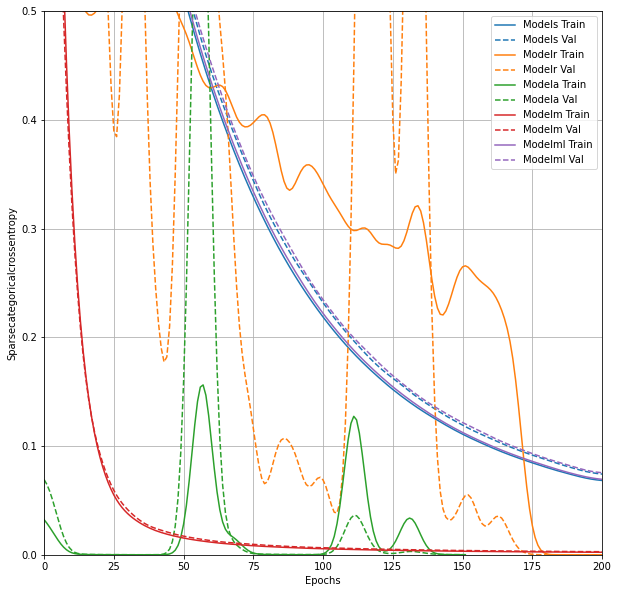

In [63]:
plt.figure(figsize = (10,10))
plotter = tfdocs.plots.HistoryPlotter(metric = 'SparseCategoricalCrossentropy', smoothing_std=10)
plotter.plot(size_histories)
plt.ylim([0, 0.5])

<div dir='rtl'style="text-align: right;font-family:verdana;">
نتایج ADAM از هر دو بهتر بوده است و از روش گرادیان شیب ساده نیز بهتر عمل کرده است
روش مومنتوم خیلی اسموس تر از دو روش دیگر است
و همچنین adam سریعتر همگرا شده است.
درحالی گه گردین دیسنت هنوز خطای بالایی نسبت به روش های بهینه سازی دارد و همچنین روش مومنتوم هنوز همگرا نشده و خطای کمی دارد

نکنه دیگر نوسان بالای روش RMSprop است. و به همین ترتیب روش adam نوسان کمتری دارد چرا که ترکیبی از دو روش ممنتوم و RMSprop است.



(0.0, 2.5)

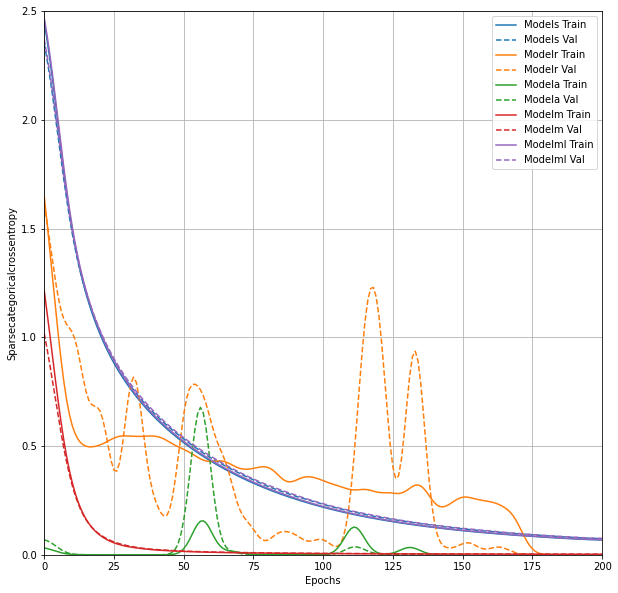

In [62]:
plt.figure(figsize = (10,10))
plotter = tfdocs.plots.HistoryPlotter(metric = 'SparseCategoricalCrossentropy', smoothing_std=10)
plotter.plot(size_histories)
plt.ylim([0, 2.5])

<div dir='rtl'style="text-align: right;font-family:verdana;">
می توانیم از رگیولاریزیشن و در optاستفاده کنیم 


اما چون هدف فقط مقایسه است فقط کد آورده شده است اشاره شده است از طرفی نمونه های بالا به خوبی جواب دقیق را برگرداندند.

In [ ]:
l2_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    layers.Dense(512, activation='elu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(512, activation='elu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(512, activation='elu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(24)
])

In [ ]:
size_histories['l2modelR'] = compile_and_fit2(modelR,'opt/SGD',optimizer='SGD')

In [ ]:
size_histories['l2modelR'] = compile_and_fit2(modelR,'opt/SGD',optimizer='RMSprop')

In [ ]:
size_histories['l2modelA'] = compile_and_fit2(l2_model,'opt/SGD',optimizer='adam')